# Regressão Linear e Logística

***

## Índice

1. [Importando bibliotecas](#Importando-bibliotecas)
2. [Análise do dataset](#Análise-do-dataset)
3. [Análise gráfica](#Análise-gráfica)
4. [Aplicando modelo de Machine Learning: KNN](#Aplicando-modelo-de-Machine-Learning:-KNN)
5. [Visualizando a fronteira](#Visualizando-a-fronteira)
6. [Como usar na prática?](#Como-usar-na-prática?)

## Importando bibliotecas

In [2]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Função para carregar nosso dataset
from sklearn.datasets import load_wine

E:\Dev\Anaconda3\envs\mscenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Análise do dataset

In [3]:
X, y = load_wine(return_X_y=True, as_frame=True)
print(len(y.unique()))

3


In [4]:
X = X[(y == 1) | (y == 0)]
y = y[(y == 0) | (y == 1)]
print(y.size)
print(len(y.unique()))

130
2


In [5]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


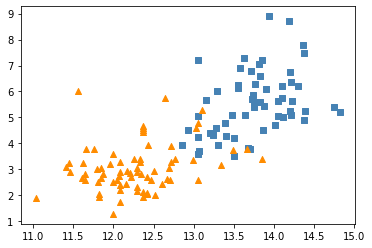

In [6]:
# vamos definir as cores e simbolos para nossas duas classses
colors = {0: "steelblue", 1: "darkorange"}
markers = {0: "s", 1: "^"}

# como essas duas classes estão distribuidas pelas duas features?
class_0_instances = (y == 0)
class_1_instances = (y == 1)
feature_0 = "alcohol"
feature_1 = "color_intensity"
plt.scatter(X[feature_0][class_0_instances], X[feature_1][class_0_instances], c=colors[0], marker=markers[0])
plt.scatter(X[feature_0][class_1_instances], X[feature_1][class_1_instances], c=colors[1], marker=markers[1])

In [7]:
# para treinar e avaliar um classificador, precisamos dividir o dataset em dois conjuntos, ...
X_train, X_test, y_train, y_test = train_test_split(X[[feature_0, feature_1]], y, test_size=0.3, random_state=199)

# ... referenciar e treinar o modelo
model = Perceptron()
model.fit(X_train, y_train)

Perceptron()

In [8]:
# qual o resultado para esse classificador?
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76        14
           1       0.95      0.72      0.82        25

    accuracy                           0.79        39
   macro avg       0.80      0.82      0.79        39
weighted avg       0.84      0.79      0.80        39



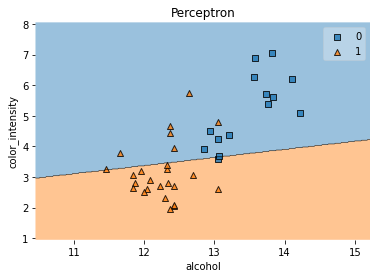

In [9]:
# vamos criar uma função que nos ajude a observar a região de decisão do classificador
def show_decision_region(x, y, clf, f0, f1):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    plt.title(clf.__class__.__name__)
    plt.show()

show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)

[Text(267.84000000000003, 543.6, 'alcohol <= 12.785\ngini = 0.495\nsamples = 91\nvalue = [41, 50]'), Text(133.92000000000002, 326.16, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]'), Text(401.76000000000005, 326.16, 'color_intensity <= 3.865\ngini = 0.249\nsamples = 48\nvalue = [41, 7]'), Text(267.84000000000003, 108.72000000000003, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'), Text(535.6800000000001, 108.72000000000003, 'gini = 0.133\nsamples = 42\nvalue = [39, 3]')]


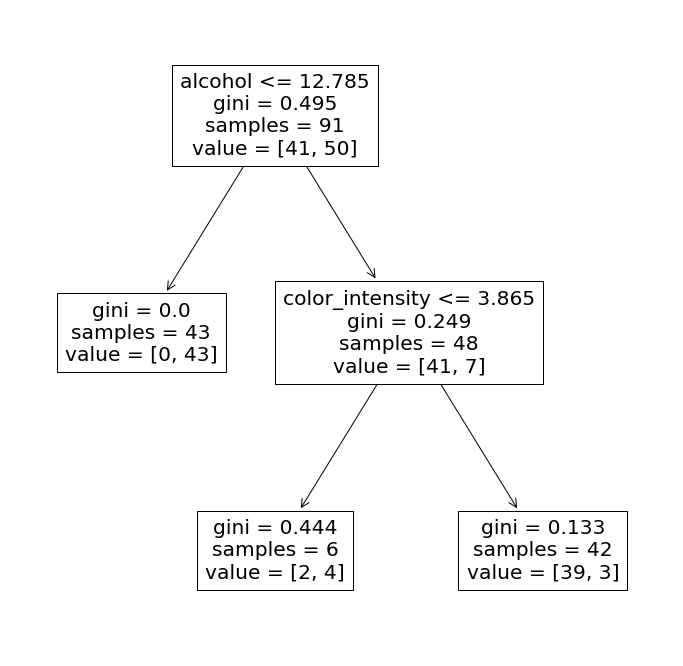

In [361]:
plt.figure(figsize=(12,12))
print(plot_tree(model, feature_names=["alcohol", "color_intensity"]))